In [1]:
# 30 Most Recent IM Races Analysis - 9/16/24
# IM Chattanooga 2023 - IM Wisconsin 2024

# At this point I have extracted the data and have it in a CSV file.
# I will now read the data and start to analyze it below.


In [2]:
# pip install requests beautifulsoup4 pandas


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import radians, cos, sin, asin, sqrt
import json
import os
from pandas import DataFrame, Series

import numpy as np

from sklearn.linear_model import LinearRegression


In [4]:
# Load the data from the CSV file
im_data = pd.read_csv("30_recent_races_results_raw.csv")

# Display the first few rows of the DataFrame
im_data.head()


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
0,46,Michael Jackson,United States,Male,M50-54,99999,99999,99999,5209,832,99999,99999,99999,99999,DNF,Wisconsin,2024
1,630,Yann Gellot,United States,Male,M50-54,99999,99999,99999,5545,1015,32667,1288,99999,99999,DNF,Wisconsin,2024
2,81,Joana Roberts,United States,Female,F40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNF,Wisconsin,2024
3,1166,Leo Buzalsky,United States,Male,M40-44,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNF,Wisconsin,2024
4,1206,Marnie Pearsall,United States,Female,F55-59,99999,99999,99999,99999,99999,99999,99999,99999,99999,DNS,Wisconsin,2024


In [6]:
# Check for missing values in the DataFrame
im_data.isnull().sum()


Bib              0
Name             0
Country          0
Gender           0
Division         0
Division Rank    0
Overall Time     0
Overall Rank     0
Swim Time        0
Swim Rank        0
Bike Time        0
Bike Rank        0
Run Time         0
Run Rank         0
Finish Status    0
Race Name        0
Year             0
dtype: int64

In [7]:
# Check for duplicate rows in the DataFrame
im_data.duplicated().sum()


0

In [8]:
# Drop duplicate rows from the DataFrame
im_data.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
im_data.shape


(49642, 17)

In [9]:
# Check the unique values in the "Finish Status" column
im_data["Finish Status"].unique()


array(['DNF', 'DNS', 'NC', 'DQ', 'FIN'], dtype=object)

In [10]:
# Let's look at just people who finished the race.
# We can do this in 2 ways: the query method, or boolean indexing.

# Query method
# Assuming im_data is your DataFrame
filtered_df = im_data.query("`Finish Status` == 'FIN'")

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49637,220,Clinton Rollins,United States,Male,M60-64,47,59224,1223,4107,1358,29565,1240,24228,1102,FIN,Chattanooga,2023
49638,1372,Nick Owens,United States,Male,M18-24,32,59275,1224,3062,940,27536,1124,27295,1221,FIN,Chattanooga,2023
49639,789,Dexter Dimalibot,United States,Male,M50-54,132,59309,1225,3183,1076,30721,1290,23607,1042,FIN,Chattanooga,2023
49640,908,Alison Senese,United States,Female,F40-44,58,59355,1226,3248,1139,30211,1266,24630,1136,FIN,Chattanooga,2023


In [11]:
# Or can use boolean indexing

# Assuming im_data is your DataFrame
filtered_df = im_data[im_data['Finish Status'] == 'FIN']

# Display the filtered DataFrame
filtered_df


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49637,220,Clinton Rollins,United States,Male,M60-64,47,59224,1223,4107,1358,29565,1240,24228,1102,FIN,Chattanooga,2023
49638,1372,Nick Owens,United States,Male,M18-24,32,59275,1224,3062,940,27536,1124,27295,1221,FIN,Chattanooga,2023
49639,789,Dexter Dimalibot,United States,Male,M50-54,132,59309,1225,3183,1076,30721,1290,23607,1042,FIN,Chattanooga,2023
49640,908,Alison Senese,United States,Female,F40-44,58,59355,1226,3248,1139,30211,1266,24630,1136,FIN,Chattanooga,2023


In [12]:
# What percentage of people finished their Ironman?

len(filtered_df) / len(im_data) * 100


87.41791225172233

In [13]:
# # Convert 'time_in_seconds' to a timestamp (timedelta format)
# filtered_df['Overall Time'] = pd.to_timedelta(filtered_df['Overall Time'], unit='s')

# filtered_df.head()


### Maybe I don't want to do this. I want to keep the time in seconds for now.


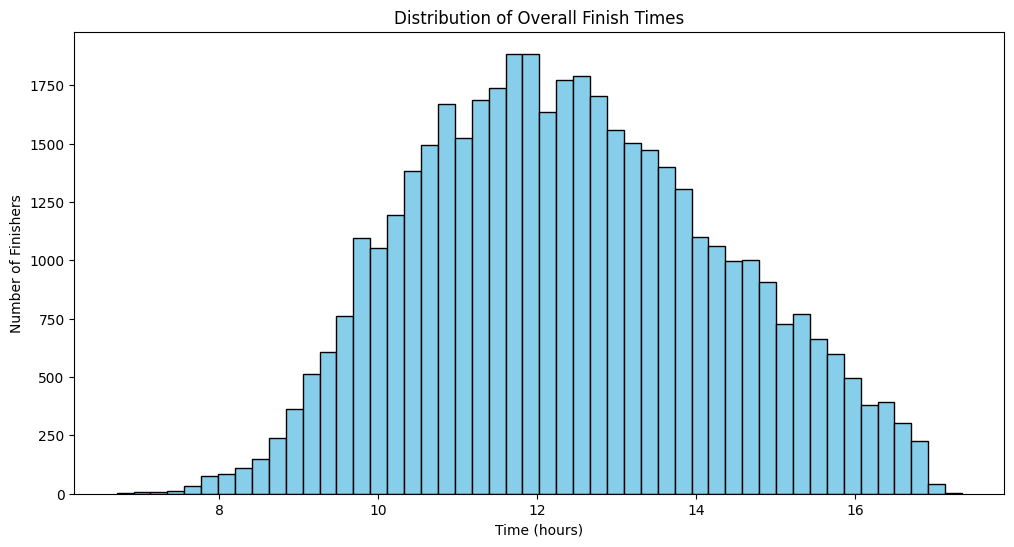

,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024


In [14]:
# Let's look at the distribution of finish times for all
# finishers in the dataset.

# Plot a histogram of the overall finish times
plt.figure(figsize=(12, 6))
# plt.hist(filtered_df['Overall Time'].dt.total_seconds() / 3600, bins=50, color='skyblue', edgecolor='black')
plt.hist(filtered_df['Overall Time'] / 3600, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Finish Times')
plt.xlabel('Time (hours)')
plt.ylabel('Number of Finishers')
plt.show()

# Display the DataFrame with the converted time format
filtered_df.head()

In [15]:
# We can assume the data is normally distributed, and calculate the mean and standard deviation.

# Calculate the mean and standard deviation of the finish times
mean_finish_time = filtered_df["Overall Time"].mean()
mean_finish_time = pd.to_timedelta(mean_finish_time, unit='s')

std_finish_time = filtered_df["Overall Time"].std()
std_finish_time = pd.to_timedelta(std_finish_time, unit='s')

mean_finish_time, std_finish_time


(Timedelta('0 days 12:24:13.343326574'),
 Timedelta('0 days 01:54:30.658856421'))

In [16]:
# Let me calculate the quantiles of the finish times.

# Calculate the quantiles
quantiles = filtered_df['Overall Time'].quantile([0.25, 0.5, 0.75])

quantiles_timedelta = pd.to_timedelta(quantiles, unit='s')
quantiles_timedelta


0.25   0 days 10:57:48
0.50   0 days 12:17:58
0.75   0 days 13:45:05
Name: Overall Time, dtype: timedelta64[ns]

In [17]:
# Let me calculate the average finish time for each race name.

# Calculate the average finish time
average_finish_time = filtered_df.groupby("Race Name")["Overall Time"].mean()
average_finish_time = pd.to_timedelta(average_finish_time, unit='s')

# Order the average finish times in ascending order
average_finish_time = average_finish_time.sort_values()

average_finish_time


Race Name
Cozumel                          0 days 11:09:59.826580227
Frankfurt                        0 days 11:24:25.991383220
Hamburg                          0 days 11:25:47.711530219
Copenhagen                       0 days 11:26:46.929084002
Vitoria-Gasteiz                  0 days 11:36:54.431428571
Brazil                           0 days 11:37:55.300159236
Canada                           0 days 11:45:53.243770314
Cairns                           0 days 12:02:00.937570942
Portugal - Cascais               0 days 12:04:01.094003241
Sweden                           0 days 12:05:27.309890110
Austria                          0 days 12:06:12.510775047
Tallinn                          0 days 12:09:14.375176305
Western Australia                0 days 12:14:54.112959720
Switzerland                      0 days 12:28:01.963594113
France                           0 days 12:32:13.444915254
Barcelona                        0 days 12:37:23.234020619
Australia                        0 days 12:37:

In [22]:
# Data in this cell was pulled from https://pjammcycling.com/

# Now I want to try something. I want to add the elevation gain on the bike ride as a column in the data frame.

# race_names = filtered_df["Race Name"].unique().tolist()
# race_names

elevation_gains = {
    "Wisconsin": 6721,
    "Canada": 7056, 
    "Tallinn": 1696, 
    "Copenhagen": 2234, 
    "Frankfurt": 5311, 
    "Sweden": 3124, 
    "Lake Placid": 6625, 
    "Vitoria-Gasteiz": 4013, 
    "Switzerland": 6451, 
    "Cairns": 4436, 
    "France": 8503, 
    "Austria": 6065, 
    "Philippines": 5568, 
    "Hamburg": 1600, 
    "Brazil": 3108, 
    "Lanzarote": 8130, 
    "Australia": 5796, 
    "Texas": 901, 
    "South Africa": 4826, 
    "New Zealand": 3420, 
    "Western Australia": 1413, 
    "Cozumel": 1444, 
    "Arizona": 1752, 
    "Florida": 1822, 
    "California": 769, 
    "Portugal - Cascais": 5206, 
    "the Ironman World Championship": 4579, 
    "Malaysia": 6925, 
    "Barcelona": 3529, 
    "Chattanooga": 5890
}

filtered_df['Bike Elevation Gain'] = filtered_df['Race Name'].map(elevation_gains)
filtered_df


/var/folders/bn/hy61x8_j5ng1fg7vpk14wkq00000gn/T/ipykernel_56785/588804274.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Bike Elevation Gain'] = filtered_df['Race Name'].map(elevation_gains)


,Bib,Name,Country,Gender,Division,Division Rank,Overall Time,Overall Rank,Swim Time,Swim Rank,Bike Time,Bike Rank,Run Time,Run Rank,Finish Status,Race Name,Year,Bike Elevation Gain
195,482,Alfredo Ramirez Pinho,United States,Male,M35-39,1,32423,1,3559,29,17083,1,11307,4,FIN,Wisconsin,2024,6721
196,206,Matt Jackson,United States,Male,M30-34,1,32804,2,3449,17,17998,5,10930,2,FIN,Wisconsin,2024,6721
197,118,Duncan Chedburn,United Kingdom,Male,M35-39,2,33290,3,3485,22,18091,7,11163,3,FIN,Wisconsin,2024,6721
198,1272,Brian Arnold,United States,Male,M30-34,2,34070,4,3672,51,17997,4,11950,8,FIN,Wisconsin,2024,6721
199,306,Kyle Martinelli,United States,Male,M30-34,3,34201,5,3770,73,17253,2,12697,23,FIN,Wisconsin,2024,6721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49637,220,Clinton Rollins,United States,Male,M60-64,47,59224,1223,4107,1358,29565,1240,24228,1102,FIN,Chattanooga,2023,5890
49638,1372,Nick Owens,United States,Male,M18-24,32,59275,1224,3062,940,27536,1124,27295,1221,FIN,Chattanooga,2023,5890
49639,789,Dexter Dimalibot,United States,Male,M50-54,132,59309,1225,3183,1076,30721,1290,23607,1042,FIN,Chattanooga,2023,5890
49640,908,Alison Senese,United States,Female,F40-44,58,59355,1226,3248,1139,30211,1266,24630,1136,FIN,Chattanooga,2023,5890


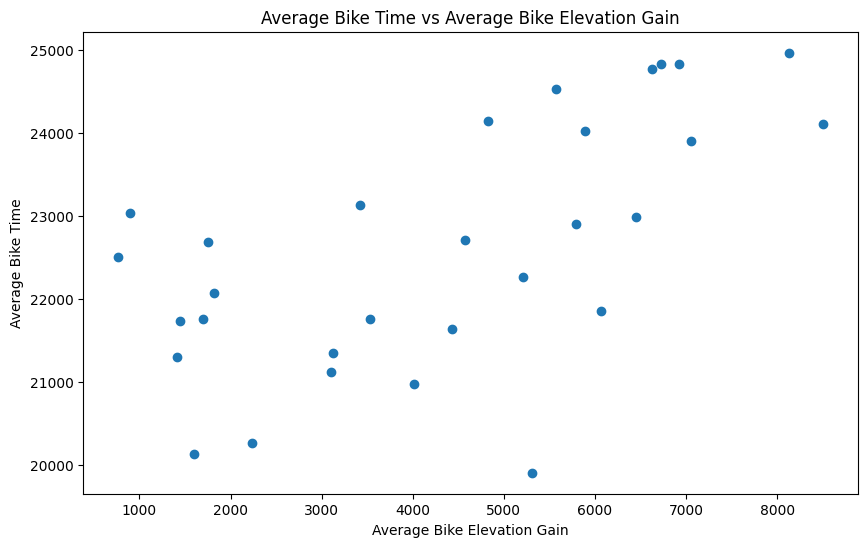

In [23]:
# Now let me make a scatterplot to see if there is a relationship between the bike elevation gain and the bike time.

# Group the filtered_df by race name and calculate the average bike time and elevation gain
grouped_df = filtered_df.groupby("Race Name").agg({"Bike Time": "mean", "Bike Elevation Gain": "mean"})

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df["Bike Elevation Gain"], grouped_df["Bike Time"])
plt.title("Average Bike Time vs Average Bike Elevation Gain")
plt.xlabel("Average Bike Elevation Gain")
plt.ylabel("Average Bike Time")
plt.show()


In [24]:
# Looks like there could be a linear relationship here.

# Let's calculate the correlation coefficient between the bike elevation gain and bike time.

# Calculate the correlation coefficient
correlation = grouped_df["Bike Elevation Gain"].corr(grouped_df["Bike Time"])
correlation


0.6262286232325213

In [27]:
grouped_df


,Bike Time,Bike Elevation Gain
Race Name,,
Arizona,22686.578154,1752.0
Australia,22911.299674,5796.0
Austria,21853.801512,6065.0
Barcelona,21757.170619,3529.0
Brazil,21127.739650,3108.0
Cairns,21643.363224,4436.0
California,22504.393061,769.0
Canada,23907.853738,7056.0
Chattanooga,24030.502037,5890.0


In [29]:
# There is a moderate positive correlation between the bike elevation gain and bike time.

# Let's calculate the linear regression line for the relationship between bike elevation gain and bike time.

# Prepare the data for the regression model
bike_elevation_gain = grouped_df[['Bike Elevation Gain']]  # X must be 2D (independent variable)
bike_time = grouped_df['Bike Time']    # y is 1D (dependent variable)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(bike_elevation_gain, bike_time)

# Get the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Equation: Y = {slope:.2f}*X + {intercept:.2f}")



Linear Equation: Y = 0.41*X + 20853.12


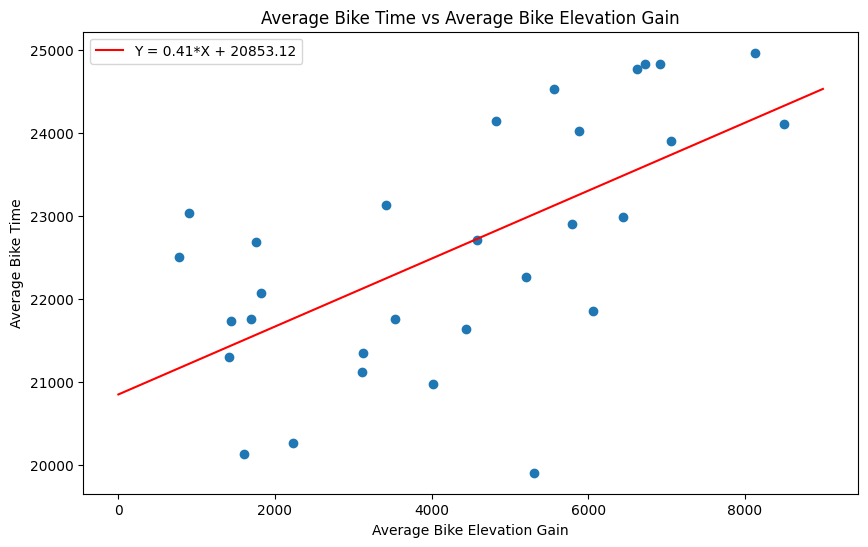

In [30]:
# Now I want to overlay the regression line on the scatter plot.

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df["Bike Elevation Gain"], grouped_df["Bike Time"])
plt.title("Average Bike Time vs Average Bike Elevation Gain")
plt.xlabel("Average Bike Elevation Gain")
plt.ylabel("Average Bike Time")

# Plot the regression line
x_values = np.linspace(0, 9000, 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label=f"Y = {slope:.2f}*X + {intercept:.2f}")
plt.legend()

plt.show()

